In [1]:
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import RobustScaler
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
from tensorflow.keras.models import Sequential


In [2]:
TTable=pd.read_excel('China2020_2021\Data2022\ThreeYearmonthdata\TTable_2.xlsx')
TTable_T=TTable.T
TTable_T=TTable_T.drop([3],axis=1)
TTable_T=TTable_T.rename(columns={4:3})
TTable_T=TTable_T.rename(columns={0:'T',1:'G',2:'C',3:'R'})
TTable_T=TTable_T.iloc[::-1]

In [3]:
TTable_T['month sin'] = np.sin(TTable_T.index.month * (2 * np.pi / 12))
TTable_T['month cos'] = np.cos(TTable_T.index.month * (2 * np.pi / 12))

In [4]:
TTable_T

T      G       C        R     month sin     month cos
2019-04-01  1000.1  185.5  3053.9  30586.1  8.660254e-01 -5.000000e-01
2019-05-01  1044.1  220.1  3222.8  32955.7  5.000000e-01 -8.660254e-01
2019-06-01  1091.4  217.9  3668.8  33878.1  1.224647e-16 -1.000000e+00
2019-07-01   934.1  174.9  3056.2  33073.3 -5.000000e-01 -8.660254e-01
2019-08-01   946.0  212.4  3051.7  33896.3 -8.660254e-01 -5.000000e-01
2019-09-01  1058.4  204.7  3397.5  34494.9 -1.000000e+00 -1.836970e-16
2019-10-01  1153.2  198.6  3228.1  38104.3 -8.660254e-01  5.000000e-01
2019-11-01  1427.0  212.0  3465.1  38093.8 -5.000000e-01  8.660254e-01
2019-12-01  1490.5  267.9  4428.1  38776.7 -2.449294e-16  1.000000e+00
2020-03-01   689.0  147.2  2609.0  26449.9  1.000000e+00  6.123234e-17
2020-04-01   798.7  154.7  3082.7  28177.8  8.660254e-01 -5.000000e-01
2020-05-01  1017.8  203.1  3376.1  31972.8  5.000000e-01 -8.660254e-01
2020-06-01  1059.3  193.4  3612.2  33525.9  1.224647e-16 -1.000000e+00
2020-07-01   889.3  178.8  3308.3  32202.5 -5.000000e-01 -8.660254e-01
2020-08-01   967.2  234.8  3412.8  33570.6 -8.660254e-01 -5.000000e-01
2020-09-01  1124.8  222.0  3866.2  35294.7 -1.000000e+00 -1.836970e-16
2020-10-01  1274.0  222.3  3708.5  38576.5 -8.660254e-01  5.000000e-01
2020-11-01  1497.5  257.6  4016.8  39514.2 -5.000000e-01  8.660254e-01
2020-12-01  1526.6  289.1  4871.1  40566.0 -2.449294e-16  1.000000e+00
2021-03-01  1129.5  259.2  3929.9  35484.1  1.000000e+00  6.123234e-17
2021-04-01  1030.5  222.1  3684.7  33152.6  8.660254e-01 -5.000000e-01
2021-05-01  1129.9  262.3  3688.1  35945.1  5.000000e-01 -8.660254e-01
2021-06-01  1174.3  240.1  3866.7  37585.8  1.224647e-16 -1.000000e+00
2021-07-01   944.6  203.1  3347.2  34925.1 -5.000000e-01 -8.660254e-01
2021-08-01   899.6  250.2  3280.1  34394.9 -8.660254e-01 -5.000000e-01
2021-09-01  1062.9  262.5  3535.4  36833.0 -1.000000e+00 -1.836970e-16
2021-10-01  1227.2  247.5  3396.8  40453.9 -8.660254e-01  5.000000e-01
2021-11-01  1484.1  270.2  3777.0  41043.2 -5.000000e-01  8.660254e-01
2021-12-01  1487.2  289.4  4651.3  41268.9 -2.449294e-16  1.000000e+00
2022-03-01   960.2  204.5  3673.1  34233.1  1.000000e+00  6.123234e-17

In [5]:
train_size = int(len(TTable_T)*0.7)
test_size = len(TTable_T)-train_size
train, test = TTable_T.iloc[0:train_size], TTable_T.iloc[train_size:len(TTable_T)]
print(len(train), len(test))


21 9


In [6]:
f_columns = ['month sin', 'month cos', 'T', 'G','C']
#f_columns = [ 'T', 'G','C']

In [7]:
f_transformer = RobustScaler()
f_transformer = f_transformer.fit(train[f_columns].to_numpy())
train.loc[:, f_columns] = f_transformer.transform(
  train[f_columns].to_numpy()
)
test.loc[:, f_columns] = f_transformer.transform(
  test[f_columns].to_numpy()
)

C:\Users\AllenVlen\AppData\Local\Temp\ipykernel_33700\1963195649.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[:, f_columns] = f_transformer.transform(
C:\Users\AllenVlen\AppData\Local\Temp\ipykernel_33700\1963195649.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, f_columns] = f_transformer.transform(


In [8]:
test

T         G         C        R     month sin     month cos
2021-05-01  0.384409  1.726644  0.566811  35945.1  3.660254e-01 -2.679492e-01
2021-06-01  0.623118  0.958478  0.934527  37585.8  2.689511e-16 -3.660254e-01
2021-07-01 -0.611828 -0.321799 -0.135063  34925.1 -3.660254e-01 -2.679492e-01
2021-08-01 -0.853763  1.307958 -0.273214  34394.9 -6.339746e-01 -4.876438e-16
2021-09-01  0.024194  1.733564  0.252419  36833.0 -7.320508e-01  3.660254e-01
2021-10-01  0.907527  1.214533 -0.032942  40453.9 -6.339746e-01  7.320508e-01
2021-11-01  2.288710  2.000000  0.749846  41043.2 -3.660254e-01  1.000000e+00
2021-12-01  2.305376  2.664360  2.549928  41268.9  0.000000e+00  1.098076e+00
2022-03-01 -0.527957 -0.273356  0.535928  34233.1  7.320508e-01  3.660254e-01

In [9]:
cnt_transformer = RobustScaler()
cnt_transformer = cnt_transformer.fit(train[['R']])
train['R'] = cnt_transformer.transform(train[['R']])
test['R'] = cnt_transformer.transform(test[['R']])

C:\Users\AllenVlen\AppData\Local\Temp\ipykernel_33700\1108446858.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['R'] = cnt_transformer.transform(train[['R']])
C:\Users\AllenVlen\AppData\Local\Temp\ipykernel_33700\1108446858.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['R'] = cnt_transformer.transform(test[['R']])


In [10]:
test

T         G         C         R     month sin     month cos
2021-05-01  0.384409  1.726644  0.566811  0.402289  3.660254e-01 -2.679492e-01
2021-06-01  0.623118  0.958478  0.934527  0.721609  2.689511e-16 -3.660254e-01
2021-07-01 -0.611828 -0.321799 -0.135063  0.203772 -3.660254e-01 -2.679492e-01
2021-08-01 -0.853763  1.307958 -0.273214  0.100582 -6.339746e-01 -4.876438e-16
2021-09-01  0.024194  1.733564  0.252419  0.575096 -7.320508e-01  3.660254e-01
2021-10-01  0.907527  1.214533 -0.032942  1.279812 -6.339746e-01  7.320508e-01
2021-11-01  2.288710  2.000000  0.749846  1.394504 -3.660254e-01  1.000000e+00
2021-12-01  2.305376  2.664360  2.549928  1.438431  0.000000e+00  1.098076e+00
2022-03-01 -0.527957 -0.273356  0.535928  0.069092  7.320508e-01  3.660254e-01

In [11]:
train

T         G         C         R     month sin     month cos
2019-04-01 -0.313441 -0.930796 -0.738933 -0.640704  6.339746e-01  0.000000e+00
2019-05-01 -0.076882  0.266436 -0.391188 -0.179522  3.660254e-01 -2.679492e-01
2019-06-01  0.177419  0.190311  0.527074  0.000000  2.689511e-16 -3.660254e-01
2019-07-01 -0.668280 -1.297578 -0.734198 -0.156634 -3.660254e-01 -2.679492e-01
2019-08-01 -0.604301  0.000000 -0.743463  0.003542 -6.339746e-01 -4.876438e-16
2019-09-01  0.000000 -0.266436 -0.031501  0.120044 -7.320508e-01  3.660254e-01
2019-10-01  0.509677 -0.477509 -0.380276  0.822522 -6.339746e-01  7.320508e-01
2019-11-01  1.981720 -0.013841  0.107680  0.820478 -3.660254e-01  1.000000e+00
2019-12-01  2.323118  1.920415  2.090385  0.953387  0.000000e+00  1.098076e+00
2020-03-01 -1.986022 -2.256055 -1.654931 -1.445710  7.320508e-01  3.660254e-01
2020-04-01 -1.396237 -1.996540 -0.679638 -1.109418  6.339746e-01  0.000000e+00
2020-05-01 -0.218280 -0.321799 -0.075561 -0.370818  3.660254e-01 -2.679492e-01
2020-06-01  0.004839 -0.657439  0.410541 -0.068547  2.689511e-16 -3.660254e-01
2020-07-01 -0.909140 -1.162630 -0.215153 -0.326113 -3.660254e-01 -2.679492e-01
2020-08-01 -0.490323  0.775087  0.000000 -0.059847 -6.339746e-01 -4.876438e-16
2020-09-01  0.356989  0.332180  0.933498  0.275705 -7.320508e-01  3.660254e-01
2020-10-01  1.159140  0.342561  0.608812  0.914424 -6.339746e-01  7.320508e-01
2020-11-01  2.360753  1.564014  1.243566  1.096923 -3.660254e-01  1.000000e+00
2020-12-01  2.517204  2.653979  3.002471  1.301629  0.000000e+00  1.098076e+00
2021-03-01  0.382258  1.619377  1.064649  0.312567  7.320508e-01  3.660254e-01
2021-04-01 -0.150000  0.335640  0.559811 -0.141200  6.339746e-01  0.000000e+00

In [12]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [13]:
train_dropR=train.drop(['R'],axis=1)
test_dropR=test.drop(['R'],axis=1)

In [14]:
time_steps = 1
#reshape to [samples, time_steps, n_features]
X_train, y_train = create_dataset(train_dropR, train.R, time_steps)
X_test, y_test = create_dataset(test_dropR, test.R, time_steps)
print(X_train.shape, X_test.shape)

(20, 1, 5) (8, 1, 5)


In [15]:
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128,
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [16]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.1,
    shuffle=False
)

Epoch 1/30
1/1 [==============================] - 8s 8s/step - loss: 0.5493 - val_loss: 0.0462
Epoch 2/30
1/1 [==============================] - 0s 94ms/step - loss: 0.5387 - val_loss: 0.0384
Epoch 3/30
1/1 [==============================] - 0s 78ms/step - loss: 0.5265 - val_loss: 0.0325
Epoch 4/30
1/1 [==============================] - 0s 90ms/step - loss: 0.4989 - val_loss: 0.0284
Epoch 5/30
1/1 [==============================] - 0s 93ms/step - loss: 0.4953 - val_loss: 0.0262
Epoch 6/30
1/1 [==============================] - 0s 85ms/step - loss: 0.4890 - val_loss: 0.0255
Epoch 7/30
1/1 [==============================] - 0s 78ms/step - loss: 0.4717 - val_loss: 0.0261
Epoch 8/30
1/1 [==============================] - 0s 94ms/step - loss: 0.4556 - val_loss: 0.0277
Epoch 9/30
1/1 [==============================] - 0s 94ms/step - loss: 0.4688 - val_loss: 0.0302
Epoch 10/30
1/1 [==============================] - 0s 94ms/step - loss: 0.4468 - val_loss: 0.0331
Epoch 11/30
1/1 [==============

In [17]:
X_train

array([[[-3.13440860e-01, -9.30795848e-01, -7.38933498e-01,
          6.33974596e-01,  0.00000000e+00]],

       [[-7.68817204e-02,  2.66435986e-01, -3.91187976e-01,
          3.66025404e-01, -2.67949192e-01]],

       [[ 1.77419355e-01,  1.90311419e-01,  5.27074326e-01,
          2.68951103e-16, -3.66025404e-01]],

       [[-6.68279570e-01, -1.29757785e+00, -7.34198065e-01,
         -3.66025404e-01, -2.67949192e-01]],

       [[-6.04301075e-01,  0.00000000e+00, -7.43463043e-01,
         -6.33974596e-01, -4.87643797e-16]],

       [[ 0.00000000e+00, -2.66435986e-01, -3.15009265e-02,
         -7.32050808e-01,  3.66025404e-01]],

       [[ 5.09677419e-01, -4.77508651e-01, -3.80275890e-01,
         -6.33974596e-01,  7.32050808e-01]],

       [[ 1.98172043e+00, -1.38408304e-02,  1.07679638e-01,
         -3.66025404e-01,  1.00000000e+00]],

       [[ 2.32311828e+00,  1.92041522e+00,  2.09038501e+00,
          0.00000000e+00,  1.09807621e+00]],

       [[-1.98602151e+00, -2.25605536e+00, -1.

In [18]:
y_train

array([-0.17952161,  0.        , -0.15663378,  0.00354217,  0.12004437,
        0.82252194,  0.82047839,  0.95338744, -1.4457095 , -1.10941788,
       -0.37081801, -0.06854674, -0.32611277, -0.05984703,  0.27570503,
        0.91442362,  1.09692299,  1.30162901,  0.3125669 , -0.14120005])

In [19]:
x_test=model.predict(X_test)

In [20]:
X_test

array([[[ 3.84408602e-01,  1.72664360e+00,  5.66810789e-01,
          3.66025404e-01, -2.67949192e-01]],

       [[ 6.23118280e-01,  9.58477509e-01,  9.34527486e-01,
          2.68951103e-16, -3.66025404e-01]],

       [[-6.11827957e-01, -3.21799308e-01, -1.35062796e-01,
         -3.66025404e-01, -2.67949192e-01]],

       [[-8.53763441e-01,  1.30795848e+00, -2.73213918e-01,
         -6.33974596e-01, -4.87643797e-16]],

       [[ 2.41935484e-02,  1.73356401e+00,  2.52419189e-01,
         -7.32050808e-01,  3.66025404e-01]],

       [[ 9.07526882e-01,  1.21453287e+00, -3.29421454e-02,
         -6.33974596e-01,  7.32050808e-01]],

       [[ 2.28870968e+00,  2.00000000e+00,  7.49845584e-01,
         -3.66025404e-01,  1.00000000e+00]],

       [[ 2.30537634e+00,  2.66435986e+00,  2.54992794e+00,
          0.00000000e+00,  1.09807621e+00]]])

In [21]:
x_test

array([[0.14020902],
       [0.21918283],
       [0.05836449],
       [0.17534332],
       [0.36715353],
       [0.48528245],
       [0.6046376 ],
       [0.45092663]], dtype=float32)

In [22]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(x_test,y_test))
print('Mean Squared Error:', metrics.mean_squared_error(x_test,y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(x_test,y_test)))

Mean Absolute Error: 0.5095360526442458
Mean Squared Error: 0.37506060277436093
Root Mean Squared Error: 0.6124219156548538


##without time sin and cos 
 - Mean Absolute Error: 0.9822543946651277
 - Mean Squared Error: 1.087494081040169
 - Root Mean Squared Error: 1.042829842802827

In [23]:
Prediction=pd.DataFrame(cnt_transformer.inverse_transform(x_test))

In [24]:
Prediction.loc[::-1]

0
7  36195.007812
6  36984.789062
5  36371.531250
4  35764.570312
3  34779.031250
2  34177.984375
1  35004.285156
0  34598.507812

In [25]:
y_test

array([0.72160916, 0.20377182, 0.10058193, 0.57509585, 1.2798116 ,
       1.3945038 , 1.43843055, 0.06909169])

In [26]:
y_test_1=np.flipud(y_test)

In [27]:
y_test_1

array([0.06909169, 1.43843055, 1.3945038 , 1.2798116 , 0.57509585,
       0.10058193, 0.20377182, 0.72160916])

In [28]:
y_o_test=cnt_transformer.inverse_transform([y_test_1])

In [29]:
y_o_test.flatten()

array([34233.1, 41268.9, 41043.2, 40453.9, 36833. , 34394.9, 34925.1,
       37585.8])

In [30]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_o_test.flatten(),Prediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_o_test.flatten(),Prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_o_test.flatten(),Prediction)))

Mean Absolute Error: 3208.2061523437505
Mean Squared Error: 16242434.744505083
Root Mean Squared Error: 4030.1904104527225


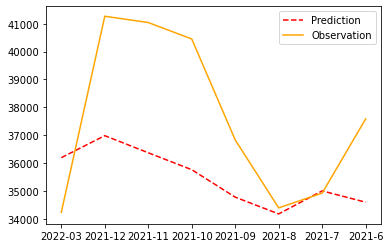

In [31]:
Prediction.values.flatten()
Date=['2022-03', '2021-12','2021-11',
       '2021-10', '2021-09','2021-8','2021-7','2021-6']

plt.plot(Date,np.flipud(Prediction.values),'r--',label="Prediction")
plt.plot(Date,y_o_test.flatten(),'orange',label="Observation")
plt.legend()

In [32]:
model.evaluate(X_test,x_test)

1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00


0.0